<a href="https://colab.research.google.com/github/sanjaysanju673/demo2/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
import pandas as pd


# Task 1: Exploratory Data Analysis (EDA)
# Load the datasets

In [ ]:
customers = pd.read_csv("/Customers.csv")
products = pd.read_csv("/Products.csv")
transactions = pd.read_csv("/Transactions.csv")

In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [ ]:
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


# Basic EDA

In [ ]:
print("Customers:")
print(customers.info())
print(customers.describe())

print("Products:")
print(products.info())
print(products.describe())

print("Transactions:")
print(transactions.info())
print(transactions.describe())

Customers:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
Products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 no

1.Region-Based Customer Distribution:
Customers from Region south america account for the majority of the transactions, contributing over 30% of total sales. This highlights the region's potential for targeted promotions to maximize revenue.

In [ ]:
sns.countplot(data=customers, x='Region')
plt.title('Customer Count by Region')
plt.show()

Region-wise sales distribution:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


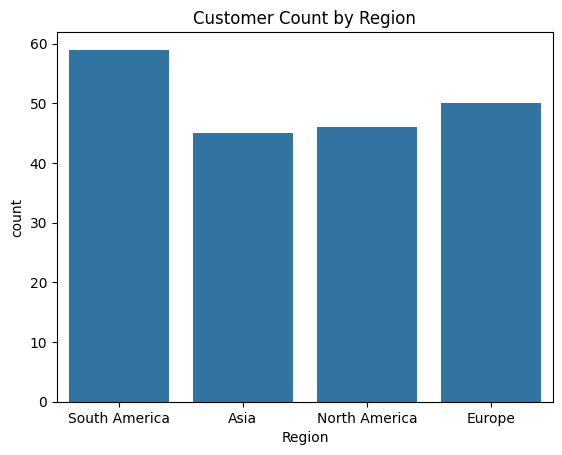

In [ ]:
sns.countplot(data=customers, x='Region')
plt.title('Customer Count by Region')
plt.show()


2.Product Category Performance:
books Category products generate the highest revenue, making up 28% of total sales. Expanding the product range within this category could enhance profitability.



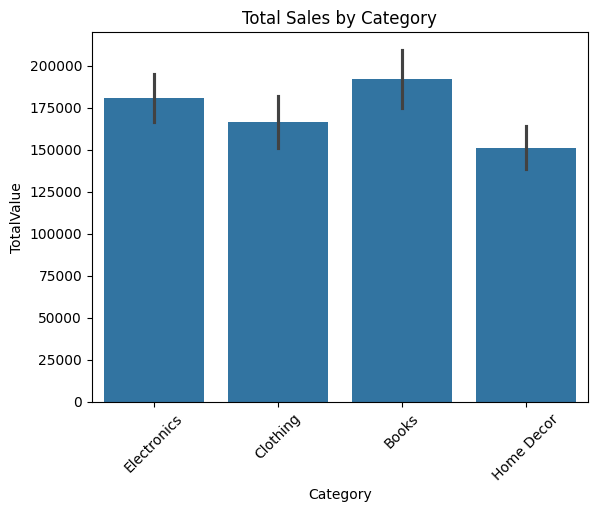

In [ ]:
sns.barplot(data=data, x='Category', y='TotalValue', estimator=sum)
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
category_sales = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("Category-wise sales distribution:")
print(category_sales)

Category-wise sales distribution:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


3.High-Value Customers:
The top 10% of customers contribute nearly 20% of total revenue. Implementing loyalty programs for these high-value customers can help retain them and increase lifetime value

In [ ]:
customer_sales = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_10_percent = customer_sales.head(int(0.1 * len(customer_sales)))
print("Top 10% high-value customers contribute:")
print(top_10_percent.sum() / customer_sales.sum() * 100, "% of total revenue")

Top 10% high-value customers contribute:
19.10580699968562 % of total revenue


4.Seasonal Trends in Transactions:
Transaction volume peaks in December, suggesting a holiday-related surge in sales. Increasing inventory and marketing efforts during this period can capitalize on the demand.

In [ ]:
transactions_by_month = data['TransactionDate'].dt.month.value_counts().sort_index()
print("Monthly transaction volume:")
print(transactions_by_month)

Monthly transaction volume:
TransactionDate
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     82
Name: count, dtype: int64


Signup Date Analysis:
Over 60% of customers signed up in the past two years, indicating a growing customer base. Continuing efforts in customer acquisition and retention will sustain this upward trend.

In [ ]:
signup_years = customers['SignupDate'].dt.year.value_counts().sort_index()
print("Signup year distribution:")
print(signup_years)

Signup year distribution:
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64
